<img src=attachment:09375636-629b-4ee2-9011-455f6157ab16.png title="Juelich Supercomputing Centre" width="360" align="left" style="float:right"/>
<H1>Create your own Jupyter CONDA-Kernel</H1>
<HR>
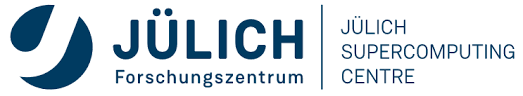

## Building your own Jupyter CONDA-kernel is a three step process
Download Minconda installer
1. Download/Install Miniconda
   * Miniconda3.sh
2. Create Conda Environment
   * conda create
2. Create/Edit launch script for the Jupyter kernel
   * kernel.sh
3. Create/Edit Jupyter kernel configuration
   * kernel.json

### Settings

Selectable **CONDA_TARGET_DIR** path for the central conda installation, should be in the project filesystem

In [ ]:
export CONDA_TARGET_DIR=${HOME}/PROJECT_training2005/testdir/miniconda3

Selectable **CONDA_ENV** name, will be used to specify the environment name
  - must be lowercase

In [ ]:
CONDA_ENV=my_env

export CONDA_ENV=$(echo "${CONDA_ENV}" | awk '{print tolower($0)}')
echo ${KERNEL_NAME} # double check

---
## 1. Download/Install Miniconda

Start here if you want to run the full installation.
If you want to create another environment in an existing conda setup go to **create environment**. If you want to attach yourself to an existing environment go to **create user kernel**.

* 1.1 - Download Minconda installer

In [ ]:
curl https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh -o $HOME/Miniconda3.sh

* 1.2 - Create target directory

In [ ]:
mkdir -p ${CONDA_TARGET_DIR}

* 1.3 - Install Miniconda

In [ ]:
bash $HOME/Miniconda3.sh -b -u -p ${CONDA_TARGET_DIR}

In [ ]:
${CONDA_TARGET_DIR}/bin/conda init bash

* 1.4 - Disable automatic activation

In [ ]:
${CONDA_TARGET_DIR}/bin/conda config --set auto_activate_base false

---
## 2. Create conda environment

Create new conda environment. The following steps can be repeated if multiple environments should be created. If the Python version differ towards the external Python version, a mix of Conda modules and external modules will not be possible

In [ ]:
${CONDA_TARGET_DIR}/bin/conda create -n ${CONDA_ENV} -y python=3.6.8 ipykernel

---
## 3. Create/Edit launch script for the Jupyter kernel

* 3.1 - Create kernel to allow access to the conda environment. Adapte `module purge` and `PYTHONPATH` according to the comments.

In [ ]:
echo '#!/bin/bash

# module purge # optional to disable the external environment, necessary, if python version is different
 
# Activate your Python virtual environment
source '"${CONDA_TARGET_DIR}"'/bin/activate '"${CONDA_ENV}"'
    
# Ensure python packages installed in conda are always prefered, not necessary if module purge is used
export PYTHONPATH=${CONDA_PREFIX}/lib/python3.6/site-packages:${PYTHONPATH}
    
exec python -m ipykernel $@' > ${CONDA_TARGET_DIR}/envs/${CONDA_ENV}/kernel.sh

In [ ]:
chmod +x ${CONDA_TARGET_DIR}/envs/${CONDA_ENV}/kernel.sh

---
## 4. Create/Edit Jupyter kernel configuration

* 4.1 - Create user kernel, if you want to access the conda environment of a colleague, only these steps are necessary

In [ ]:
mkdir -p $HOME/.local/share/jupyter/kernels/conda_${CONDA_ENV}

* 4.2 - Adjust kernel.json file

In [ ]:
echo '{
 "argv": [
  "'"${CONDA_TARGET_DIR}"'/envs/'"${CONDA_ENV}"'/kernel.sh",
  "-f",
  "{connection_file}"
 ],
 "display_name": "conda_'"${CONDA_ENV}"'",
 "language": "python"
}' > $HOME/.local/share/jupyter/kernels/conda_${CONDA_ENV}/kernel.json

Restart of JupyterLab might be necessary to see the kernel in the kernel selection overview.